## Predicting the Total Length Of a possum from other factors

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
possumData = pd.read_csv("/Users/taanya/Downloads/possum.csv")

In [4]:
possumData.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
# Looking at some information about the dataset:
possumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


We can see that age and footlgth has some missing values. We will have to take care of this later. We also have 2 values that arent floats or integer.

In [6]:
# Having a look at attributes like mean, std, min, max etc
possumData.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


array([[<AxesSubplot:title={'center':'case'}>,
        <AxesSubplot:title={'center':'site'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hdlngth'}>,
        <AxesSubplot:title={'center':'skullw'}>,
        <AxesSubplot:title={'center':'totlngth'}>],
       [<AxesSubplot:title={'center':'taill'}>,
        <AxesSubplot:title={'center':'footlgth'}>,
        <AxesSubplot:title={'center':'earconch'}>],
       [<AxesSubplot:title={'center':'eye'}>,
        <AxesSubplot:title={'center':'chest'}>,
        <AxesSubplot:title={'center':'belly'}>]], dtype=object)

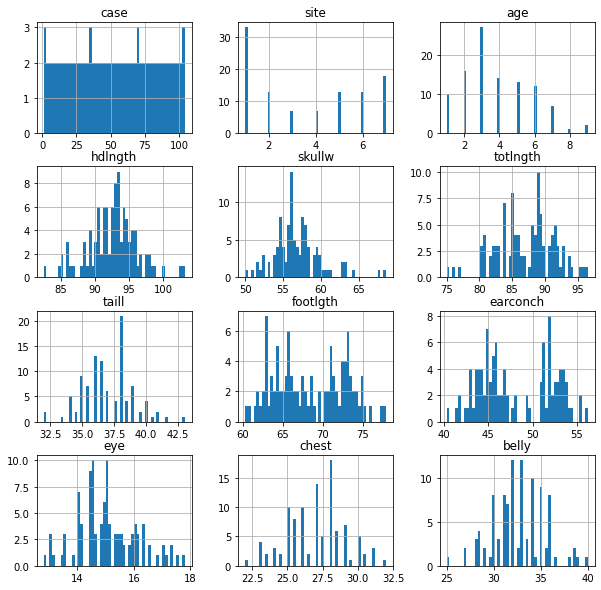

In [7]:
# Plotting a histogram to have a better idea of the data
%matplotlib inline
possumData.hist(bins = 50, figsize = (10,10))

In [8]:
# Splitting the data into training and test set:
from sklearn.model_selection import train_test_split
# Removing case as it doesn't contribute much to the data 
possumData = possumData.drop(['case'], axis = 1)
train_set, test_set = train_test_split(possumData, test_size = 0.2, random_state = 42)

In [9]:
len(train_set)

83

In [10]:
len(test_set)

21

In [11]:
# Creating a copy of the training set so that we can work without harming it:
possum = train_set.copy()

<AxesSubplot:xlabel='totlngth', ylabel='skullw'>

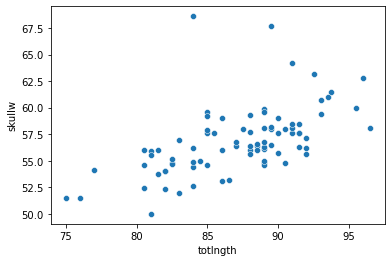

In [12]:
# Creating a scatter plot to visualise the relationship between bmi and stroke for instance:
sns.scatterplot(data = possum, x = 'totlngth', y = 'skullw' )

In [13]:
# Looking at the correlation between 'totlngth' and other variables:
correlation = possum.corr()
correlation['totlngth'].sort_values(ascending = False)

totlngth    1.000000
hdlngth     0.733074
chest       0.595346
taill       0.591903
belly       0.570228
skullw      0.563319
footlgth    0.427549
age         0.244830
eye         0.233363
earconch    0.110798
site       -0.201273
Name: totlngth, dtype: float64

<AxesSubplot:>

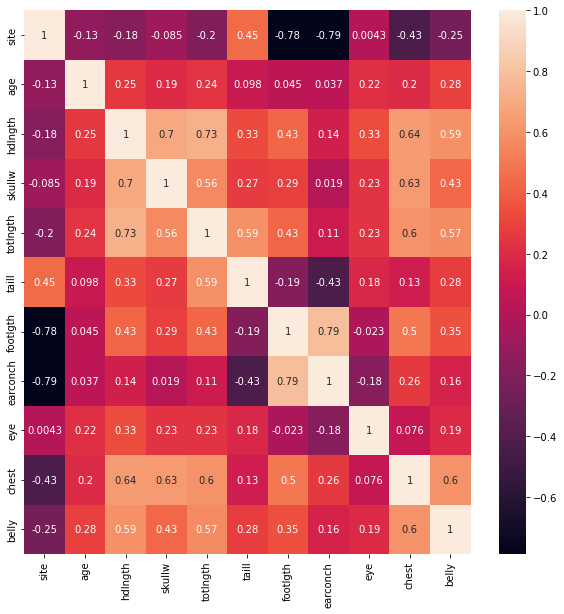

In [14]:
# Creating a heatmap to visualise the correlation:
plt.figure(figsize = (10,10))
sns.heatmap(data = correlation, annot = True)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='belly', ylabel='age'>,
        <AxesSubplot:xlabel='hdlngth', ylabel='age'>,
        <AxesSubplot:xlabel='totlngth', ylabel='age'>,
        <AxesSubplot:xlabel='eye', ylabel='age'>,
        <AxesSubplot:xlabel='chest', ylabel='age'>,
        <AxesSubplot:xlabel='skullw', ylabel='age'>,
        <AxesSubplot:xlabel='taill', ylabel='age'>,
        <AxesSubplot:xlabel='footlgth', ylabel='age'>,
        <AxesSubplot:xlabel='earconch', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='belly'>,
        <AxesSubplot:xlabel='belly', ylabel='belly'>,
        <AxesSubplot:xlabel='hdlngth', ylabel='belly'>,
        <AxesSubplot:xlabel='totlngth', ylabel='belly'>,
        <AxesSubplot:xlabel='eye', ylabel='belly'>,
        <AxesSubplot:xlabel='chest', ylabel='belly'>,
        <AxesSubplot:xlabel='skullw', ylabel='belly'>,
        <AxesSubplot:xlabel='taill', ylabel='belly'>,
        <AxesSubplot:xlabel='footlgth

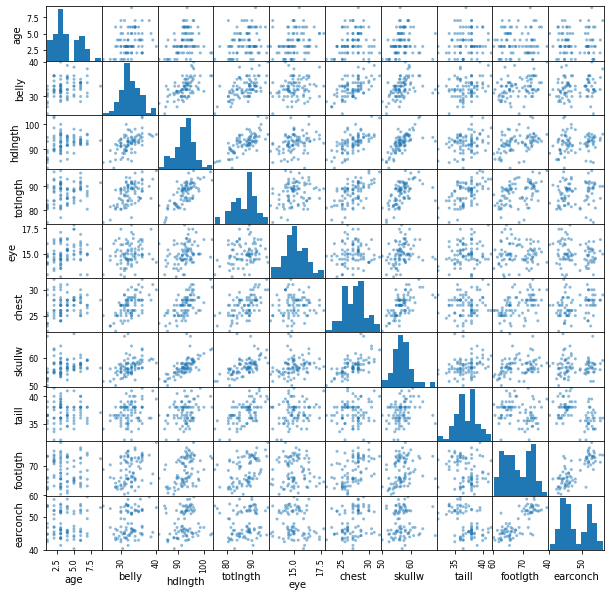

In [15]:
# Another method of visualising the correlation is by using the scatter_matrix of pandas:
from pandas.plotting import scatter_matrix     
attributes = ['age','belly', 'hdlngth', 'totlngth', 'eye', 'chest', 'skullw', 'taill', 'footlgth', 'earconch' ]
scatter_matrix(possum[attributes], figsize = (10,10))

In [16]:
# Preparing the data for Machine Learning Algorithms:
possum_data = possum.drop('totlngth', axis = 1)
possum_labels = possum['totlngth'].copy()

In [17]:
possum_data

,site,Pop,sex,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
55,4,other,m,3.0,99.9,61.5,38.0,68.7,46.8,16.4,27.5,31.5
22,1,Vic,f,4.0,92.5,56.1,36.0,72.8,53.3,15.4,28.0,35.0
76,6,other,m,6.0,93.6,56.2,36.0,62.8,42.9,16.2,25.0,35.0
44,2,Vic,m,3.0,90.7,55.9,34.0,71.5,54.0,14.6,27.0,31.5
72,5,other,m,1.0,82.5,52.3,36.5,65.7,44.7,16.0,23.5,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,other,m,1.0,85.9,52.4,35.0,62.0,42.4,14.1,25.5,30.0
14,1,Vic,m,5.0,92.9,57.6,34.0,69.7,51.8,15.7,28.0,35.0
92,7,other,m,3.0,89.2,54.0,38.0,63.8,44.9,12.8,24.0,31.0
51,3,other,m,6.0,97.6,61.0,40.0,67.9,44.3,15.8,28.5,32.5


In [18]:
possum_labels

55     93.7
22     89.0
76     84.0
44     81.0
72     82.0
       ... 
71     80.5
14     85.5
92     82.0
51     93.5
102    82.5
Name: totlngth, Length: 83, dtype: float64

### Data Cleaning

In [19]:
#-----> As we saw earlier, we do have a lot of missing values. We need to fix these.
#-----> For this dataset we choose to fill these missing values with the median of the values:
#median = possum_data['age'].median()
#possum_data['age'].fillna(median, inplace = True)
#median = possum_data['footlgth'].median()
#possum_data['footlgth'].fillna(median, inplace = True)

In [20]:
# Another method to fill in missing values is to use Scikit learns SimpleImputer()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
# The median can only be computed on numerical attributes. So we need to remove the non numerical attributes:
possum_num = possum_data.drop(['Pop','sex'], axis = 1)
imputer.fit(possum_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([ 3.  ,  3.  , 92.8 , 56.4 , 37.  , 67.75, 46.8 , 15.  , 27.  ,
       32.  ])

In [22]:
possum_num.median().values

array([ 3.  ,  3.  , 92.8 , 56.4 , 37.  , 67.75, 46.8 , 15.  , 27.  ,
       32.  ])

In [23]:
X = imputer.transform(possum_num) # In the form of a numpy array -> Added missing values

In [24]:
possum_num2 = pd.DataFrame(X, columns =possum_num.columns)

In [25]:
possum_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      83 non-null     float64
 1   age       83 non-null     float64
 2   hdlngth   83 non-null     float64
 3   skullw    83 non-null     float64
 4   taill     83 non-null     float64
 5   footlgth  83 non-null     float64
 6   earconch  83 non-null     float64
 7   eye       83 non-null     float64
 8   chest     83 non-null     float64
 9   belly     83 non-null     float64
dtypes: float64(10)
memory usage: 6.6 KB


In [26]:
# Converting categorical values to numerical :
possum_cat = possum_data[['Pop','sex']]
possum_cat = possum_cat.values.reshape(-1,1)

In [27]:
# -----> Doing this by using Scikitlearns OrdinalEncoder:
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#ordinal_encoder.fit(possum_cat)

In [28]:
#possum_cat_ordinal = ordinal_encoder.transform(possum_cat) 
# ------> Instead of this we can directly do :
#possum_cat_ordinal = ordinal_encoder.fit_transform(possum_cat)

In [29]:
#possum_cat_ordinal[:10]

In [30]:
#------>Better method of doing this is by one hot encoding: 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
possum_cat_encoder = cat_encoder.fit_transform(possum_cat) #---> For multiple variables can use for single variable too if 
#reshaped.

In [31]:
possum_cat_encoder

<166x4 sparse matrix of type '<class 'numpy.float64'>'
	with 166 stored elements in Compressed Sparse Row format>

In [32]:
cat_encoder.categories_

[array(['Vic', 'f', 'm', 'other'], dtype=object)]

### Feature Scaling and Transformation Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# This is already done, just for extra info ---->
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('std_scaler' , StandardScaler())])
pipeline_tr = num_pipeline.fit_transform(possum_num)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [40]:
# To work on both numerical and categorical data together, Scikit learn has ColumnTransform
from sklearn.compose import ColumnTransformer
num_attributes = list(possum_num)
cat_attributes = (['Pop', 'sex'])
full_pipeline = ColumnTransformer([('num',num_pipeline, num_attributes),('cat', OneHotEncoder(), cat_attributes)])
possum_prepared = full_pipeline.fit_transform(possum_data)

### Select and Train a model:

In [215]:
# Trying out a linear model:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(possum_prepared, possum_labels)

LinearRegression()

In [216]:
print("Predictions: ", linear.predict(possum_prepared))
print("Labels: ", list(possum_labels))

Predictions:  [91.7602013  88.26348256 83.74554729 83.06286998 80.39018203 85.18019647
 81.37232076 84.86235036 89.53146353 84.58011058 88.30430994 90.67929531
 79.90812696 86.79750283 82.40375479 87.92582313 87.52586281 94.60183687
 86.66240849 86.31208779 90.11015817 85.60179185 86.71995268 90.83542603
 81.43884231 88.98944498 88.11144    86.01300584 91.65569351 88.3523067
 89.74008776 84.65515676 89.11355783 88.86924611 88.38644845 92.06561984
 87.84503285 80.02403275 90.3095559  81.53997609 88.28839781 87.99199481
 84.44156243 88.08876684 81.25984858 94.41991381 88.01693779 90.10941643
 86.29640982 82.18482866 88.63926088 84.81115726 84.46778106 75.77005412
 97.01645288 89.7491434  87.37524951 90.90592759 90.04519987 86.70204289
 83.57444057 88.4646459  89.39134108 86.18377909 85.0590682  83.44817855
 89.10377517 89.77211832 93.27284568 93.87770457 85.82843477 85.63806956
 84.87371387 87.51279893 94.13482626 82.51371201 95.48153061 88.19559417
 79.16908995 84.43848717 83.56174561 9

In [217]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
possum_predictions = linear.predict(possum_prepared)
mse = mean_squared_error(possum_predictions , possum_labels)
rmse = np.sqrt(mse)

In [218]:
rmse

1.9753804942638307

In [219]:
# Trying out the same using Cross Validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear, possum_prepared, possum_labels , scoring = 'neg_mean_squared_error',cv = 3)
rmse = np.sqrt(-scores)


In [220]:
def display(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [221]:
display(rmse)

Scores:  [2.08299295 2.78396094 2.31497594]
Mean:  2.3939766088855525
Standard Deviation:  0.29157030098845754


In [222]:
meanabsoluteerror = mean_absolute_error(possum_predictions, possum_labels)
print("The mean absolute error is : ", meanabsoluteerror)

The mean absolute error is :  1.6047243984081327


In [223]:
# Trying it out with DecisionTreeRegressor:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(possum_prepared, possum_labels)

DecisionTreeRegressor()

In [224]:
predicted_values = tree_reg.predict(possum_prepared)
mse = mean_squared_error(predicted_values, possum_labels)
rmse = np.sqrt(mse)

In [225]:
rmse

0.0

This seems to be overfitting.

In [226]:
# Trying out the same thing using cross validation:
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_reg,possum_prepared, possum_labels, scoring = 'neg_mean_squared_error' ,cv = 3)
rmse = np.sqrt(-score)


In [227]:
display(rmse)

Scores:  [4.33956054 3.05421255 3.73918193]
Mean:  3.7109850060831397
Standard Deviation:  0.525119775340138


In [228]:
meanabsoluteerror = mean_absolute_error(predicted_values, possum_labels)
print("The mean absolute error is : ", meanabsoluteerror)


The mean absolute error is :  0.0


We can see that it actually performs worse than the Linear Regression model:

In [229]:
# Hence, let us try using RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state = 42)
rfregressor.fit(possum_prepared, possum_labels)

RandomForestRegressor(random_state=42)

In [230]:
predicted_values = rfregressor.predict(possum_prepared)
mse = mean_squared_error(predicted_values , possum_labels)
rmse = np.sqrt(mse)

In [231]:
rmse

0.962522576796708

In [232]:
# Trying out Cross Validation on this:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfregressor, possum_prepared, possum_labels, scoring = 'neg_mean_squared_error', cv = 3)
rmse = np.sqrt(-score)


In [233]:
display(rmse)

Scores:  [2.50638773 2.77279783 2.7519    ]
Mean:  2.6770285228572366
Standard Deviation:  0.12096249938211068


In [234]:
meanabsoluteerror = mean_absolute_error(predicted_values, possum_labels)
print("The mean absolute error is : ", meanabsoluteerror)


The mean absolute error is :  0.7670361445783133


We can see that we have 2 promising models ---> RandomForestRegressor() and LinearRegression()

In [250]:
# Evaluating the RandomForestRegressor on the Test Set:
x_test = test_set.drop('totlngth', axis = 1)
y_test = test_set['totlngth'].copy()

In [251]:
prepared_data_test = full_pipeline.transform(x_test)
predictions = rfregressor.predict(prepared_data_test)

In [252]:
finalmse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(finalmse)

In [253]:
rmse

2.46542766501647

In [254]:
meanabsoluteerror = mean_absolute_error(predictions, y_test)
print("The mean absolute error of Random Forest Regressor is : ", meanabsoluteerror)


The mean absolute error of Random Forest Regressor is :  2.0846190476190465


We can see that this model is not performing well on the test set. Hence we discard this model.
Trying out the test set on the linear model.

In [241]:
x_test = test_set.drop('totlngth', axis = 1)
y_test = test_set['totlngth']

In [242]:
prepared_data_test = full_pipeline.transform(x_test)
predictions = linear.predict(prepared_data_test)

In [247]:
finalmse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(finalmse)
rmse

2.630139402362738

In [248]:
meanabsoluteerror = mean_absolute_error(predictions, y_test)
print("The mean absolute error of Linear Regression is : ", meanabsoluteerror)


The mean absolute error of Linear Regression is :  1.827906079709673


This performs better than the Random Forest Regressor.